In [6]:
import dataP2
import regressor 
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures
file_path = "CCPP/CCPP/Folds5x2_pp.xlsx"


In [7]:
def nCr(n,r):
    f = math.factorial
    return f(n) // f(r) // f(n-r)


In [8]:
data = dataP2.readData(file_path)                           
test_set = data[0:1000]                     
training = data[1000:]


In [9]:
""" Part C : Multivariate polynomial regression """
n = 5    # 5 fold
M = 15
tr_rms = np.zeros(M-1)             

t_rms  = np.zeros(M-1)             

v_rms = np.zeros(M-1)              

valid_std = np.zeros(M-1)         


In [10]:
for m in range(1, M):
    valid_rms = np.zeros(n)
    train_rms = np.zeros(n)
    Weights = np.zeros((nCr(m+4,m),n)) 
    poly = PolynomialFeatures(m)
    for i in range(n):
        train_set, valid_set = dataP2.crossfold(training,n,i)
        Xtr = dataP2.getColumn(train_set, [['AT'], ['V'], ['AP'], ['RH']])
        Ytr = dataP2.getColumn(train_set, ['PE'])
        
        Xval = dataP2.getColumn(valid_set, [['AT'], ['V'], ['AP'], ['RH']])
        Yval = dataP2.getColumn(valid_set, ['PE'])
        
        Xtr_d = poly.fit_transform(Xtr)
        Xtr_d = Xtr_d[:,1:]
        
        Xval_d = poly.fit_transform(Xval)
        Xval_d = Xval_d[:,1:]
        
        W = regressor.poly_fit(Xtr_d,Ytr,1)
        print(m, W.shape, W)
        Weights[:, i] = W.reshape(W.shape[0])
        
        yval_predicted = regressor.predict(Xval_d, W,1)
        valid_rms[i] = regressor.error_rms(Yval, yval_predicted.reshape(Yval.shape))
        
        ytrain_predicted = regressor.predict(Xtr_d, W,1)
        train_rms[i] = regressor.error_rms(Ytr, ytrain_predicted.reshape(Ytr.shape))
        

    v_rms[m-1] = np.mean(valid_rms)
    tr_rms[m-1]= np.mean(train_rms)
    valid_std[m-1]  = np.std(valid_rms)
    
    min_indx = np.argsort(valid_rms)[0]
    Wmin     = Weights[:,min_indx]
    
    Xtest = dataP2.getColumn(test_set, [['AT'], ['V'], ['AP'], ['RH']]) 
    Ytest = dataP2.getColumn(test_set, ['PE'])
    
    Xtest_d = poly.fit_transform(Xtest)
    Xtest_d = Xtest_d[:,1:]
    
    ytest_predicted = regressor.predict(Xtest_d, Wmin, 1)
    t_rms[m-1]   = regressor.error_rms(Ytest, ytest_predicted.reshape(Ytest.shape))


1 (5, 1) [[-1.99375708e+00]
 [-2.30689654e-01]
 [ 5.47920285e-02]
 [-1.60796838e-01]
 [ 4.62379581e+02]]
1 (5, 1) [[-1.97881925e+00]
 [-2.36550621e-01]
 [ 6.07895846e-02]
 [-1.57522917e-01]
 [ 4.56062715e+02]]
1 (5, 1) [[-1.95470318e+00]
 [-2.44364143e-01]
 [ 7.24873907e-02]
 [-1.56392078e-01]
 [ 4.44074245e+02]]
1 (5, 1) [[-1.97211554e+00]
 [-2.37282315e-01]
 [ 6.25604313e-02]
 [-1.58041553e-01]
 [ 4.54202222e+02]]
1 (5, 1) [[-1.97381545e+00]
 [-2.35935895e-01]
 [ 5.50187983e-02]
 [-1.59186576e-01]
 [ 4.61889955e+02]]
2 (15, 1) [[-1.13031072e+01]
 [-4.23719051e-01]
 [ 1.45461418e+01]
 [ 3.00303871e+00]
 [ 2.18647817e-02]
 [ 7.59878757e-03]
 [ 8.51456066e-03]
 [-5.28996734e-03]
 [-2.91443455e-04]
 [ 1.21257837e-05]
 [-1.27033089e-04]
 [-7.09949978e-03]
 [-2.69194103e-03]
 [-1.94447780e-03]
 [-6.93919926e+03]]
2 (15, 1) [[-6.89990667e+00]
 [-2.64149552e+00]
 [ 1.54103267e+01]
 [ 4.18032643e+00]
 [ 1.67020612e-02]
 [ 1.22897401e-02]
 [ 4.19291904e-03]
 [-6.28363328e-03]
 [-1.52343562e-03

4 (70, 1) [[ 1.05054926e+05]
 [-1.00588414e+05]
 [ 1.17771569e+04]
 [ 6.84339952e+04]
 [-2.99636606e+02]
 [ 2.40144782e+02]
 [-3.00147828e+02]
 [-1.82497251e+02]
 [ 5.73558270e+00]
 [ 2.88869868e+02]
 [ 5.26612065e+01]
 [-1.41565566e+01]
 [-2.01406218e+02]
 [-7.42909195e+00]
 [-5.80406676e-02]
 [ 2.92993778e-01]
 [ 5.77019981e-01]
 [ 6.13499085e-02]
 [ 3.07684522e-02]
 [-4.92021583e-01]
 [ 2.16046969e-02]
 [ 2.85967764e-01]
 [ 3.61439541e-01]
 [-1.71494336e-02]
 [-3.82431277e-02]
 [-5.16554368e-03]
 [ 1.17291943e-02]
 [-2.76241565e-01]
 [-1.08448011e-01]
 [ 1.52858175e-02]
 [ 7.08581157e-03]
 [ 1.97661120e-01]
 [ 1.50070916e-02]
 [-2.27678674e-03]
 [-2.04702356e-04]
 [ 2.54431530e-04]
 [ 5.91734805e-05]
 [-4.08080423e-06]
 [-2.22712668e-04]
 [-2.81231148e-04]
 [ 6.24150326e-05]
 [-2.77250890e-04]
 [-6.77154451e-05]
 [ 1.86279080e-05]
 [ 6.61265172e-05]
 [-2.94857992e-05]
 [-7.04403821e-05]
 [ 2.51180828e-04]
 [-1.68061479e-05]
 [ 1.52835932e-05]
 [-9.06028569e-05]
 [-1.78475154e-04]
 [

5 (126, 1) [[ 9.55484871e+05]
 [-8.78721043e+04]
 [ 3.60785774e+03]
 [ 6.86016053e+02]
 [-3.41150439e+03]
 [ 1.88402233e+03]
 [-1.95389888e+03]
 [-1.30275311e+03]
 [-1.11561588e+03]
 [ 3.58484298e+02]
 [-8.68526264e+02]
 [ 1.10766384e+00]
 [ 4.57175509e+01]
 [-4.05551345e+02]
 [ 5.07435465e+01]
 [-4.28049807e+01]
 [ 6.36820668e+00]
 [ 8.47644997e+00]
 [ 1.01091272e+01]
 [-7.57979829e+00]
 [ 2.92143910e+01]
 [ 1.06999993e+00]
 [ 1.68242502e+00]
 [ 5.84914703e+00]
 [ 1.43578132e+01]
 [ 1.10200691e+00]
 [-2.06915312e+00]
 [-3.70747804e-01]
 [ 7.99259181e-01]
 [ 6.87854480e+00]
 [-4.82795772e-03]
 [-4.11197548e-02]
 [ 2.51773345e-01]
 [ 2.67936928e+00]
 [-1.00448807e-01]
 [ 1.56226662e-01]
 [-9.64141497e-02]
 [-4.99443883e-02]
 [-1.14594855e-01]
 [ 8.67676728e-02]
 [ 2.84799815e-02]
 [-3.89444161e-03]
 [-1.50104517e-02]
 [-1.12224585e-03]
 [ 1.80494404e-02]
 [-1.57797279e-02]
 [-3.41949370e-02]
 [ 8.95111939e-03]
 [-5.24327131e-02]
 [-1.63852286e-02]
 [-1.42416739e-04]
 [ 4.52616467e-04]
 

6 (210, 1) [[-6.74639641e+06]
 [ 4.95654371e+06]
 [ 4.69395636e+04]
 [-1.88058027e+06]
 [ 1.24235963e+04]
 [-6.16287312e+04]
 [ 1.84844398e+04]
 [ 1.28212565e+04]
 [ 2.32315148e+03]
 [-1.29684844e+04]
 [-1.73658567e+03]
 [-1.41919125e+02]
 [ 4.83329351e+03]
 [ 3.58173448e+02]
 [-7.40728082e+01]
 [ 3.23497011e+02]
 [-6.29126741e+01]
 [ 1.28411653e+02]
 [-1.20364572e+02]
 [ 1.34136555e+02]
 [-7.85446267e+01]
 [-1.52652887e+01]
 [-1.94061488e+01]
 [ 1.00308969e+01]
 [ 2.67767268e+00]
 [-2.13318113e+00]
 [-6.59620664e+00]
 [ 1.12794083e+01]
 [ 3.74803591e+00]
 [-4.13598706e+00]
 [ 1.38596388e-01]
 [-4.01743666e+00]
 [-7.08024737e-01]
 [ 1.38009412e+00]
 [ 1.60348810e+00]
 [-1.48946002e+00]
 [ 1.54775590e-01]
 [ 2.99900678e-01]
 [ 3.34155338e-01]
 [-4.54223296e-01]
 [-4.49420784e-01]
 [ 8.46368654e-02]
 [-1.66775516e-01]
 [ 1.16446100e-01]
 [-4.77981592e-03]
 [ 2.04637796e-01]
 [ 1.76305234e-01]
 [-9.49083987e-02]
 [ 1.73659493e-01]
 [-1.54427367e-01]
 [ 2.16152657e-03]
 [-1.70754916e-04]
 

7 (330, 1) [[ 2.14053335e+08]
 [-1.10896001e+08]
 [-8.54726250e+06]
 [ 1.23146670e+08]
 [ 7.91081045e+05]
 [ 8.36508963e+05]
 [-6.09899849e+05]
 [-4.31207606e+05]
 [ 3.28034066e+04]
 [ 2.89244406e+05]
 [ 1.18089482e+05]
 [ 2.58385782e+04]
 [-3.64086941e+05]
 [-1.56074434e+04]
 [ 1.29148878e+04]
 [-6.39477985e+03]
 [-4.25631719e+03]
 [ 1.52814887e+03]
 [-4.46958806e-01]
 [-1.14334763e+03]
 [-7.78117965e+02]
 [ 6.11251861e+02]
 [ 9.07496931e+02]
 [-4.06673069e+01]
 [-1.23744236e+02]
 [-1.12369693e+02]
 [-1.48038564e+01]
 [-2.44556922e+02]
 [-1.90767990e+02]
 [-5.18409918e+01]
 [-2.61523886e+01]
 [ 3.60300283e+02]
 [ 3.20229987e+01]
 [-6.12190370e+00]
 [-3.82523552e+01]
 [ 1.48765105e+01]
 [-2.03544340e+01]
 [-1.88166030e+01]
 [ 1.09633218e+01]
 [ 1.15545014e+01]
 [-2.28786828e+00]
 [ 6.00980117e+00]
 [-2.64936149e+00]
 [ 9.37879186e-01]
 [-3.19632800e-01]
 [-2.97377710e-03]
 [ 1.34182414e+00]
 [-8.79003360e-02]
 [ 1.29709698e+00]
 [-3.20860038e-01]
 [-2.46914011e-01]
 [-5.31245710e-01]
 

7 (330, 1) [[-4.32021328e+07]
 [-9.86670460e+07]
 [ 1.19801297e+07]
 [-1.30821732e+08]
 [ 1.35972167e+06]
 [-8.64330716e+05]
 [ 1.63455643e+05]
 [ 1.61168573e+06]
 [-8.42229809e+04]
 [ 3.01179607e+05]
 [ 2.52702640e+05]
 [-3.54394198e+04]
 [ 3.72631394e+05]
 [ 1.81404726e+04]
 [ 2.37332030e+04]
 [-1.28848293e+04]
 [-4.29767094e+03]
 [-3.35078147e+03]
 [-5.16707112e+03]
 [ 3.03277924e+03]
 [ 8.77757753e+02]
 [-2.60206809e+02]
 [-4.38155169e+03]
 [-2.72092717e+02]
 [ 2.08337771e+03]
 [-1.72147185e+02]
 [ 1.34742606e+03]
 [-2.90970467e+02]
 [-8.41192974e+02]
 [-2.69451832e+02]
 [ 3.53895844e+01]
 [-3.53082434e+02]
 [ 1.45699738e+01]
 [ 3.77204585e+01]
 [ 7.25128950e+01]
 [ 1.10597041e+02]
 [-4.90498607e+01]
 [ 4.77288436e+01]
 [-1.18161448e+01]
 [ 2.37768648e+01]
 [ 9.26220687e+00]
 [ 4.63178654e+00]
 [ 4.66010237e+00]
 [ 5.24495676e+00]
 [ 9.09196977e+00]
 [ 1.00819532e+01]
 [ 3.04392905e+00]
 [-3.52785001e+00]
 [-2.05720654e+00]
 [ 8.21209883e+00]
 [ 2.03188607e-01]
 [ 3.99725632e+00]
 

8 (495, 1) [[ 1.44801628e+09]
 [-1.51810125e+09]
 [-3.75719333e+07]
 [ 5.90444768e+08]
 [ 5.67484225e+07]
 [ 4.50125813e+06]
 [-4.41673035e+06]
 [-8.02760223e+05]
 [-2.26259280e+06]
 [ 4.43229493e+06]
 [ 4.42161641e+05]
 [ 1.08946271e+05]
 [-1.80224176e+06]
 [ 5.37536602e+05]
 [-7.60816086e+04]
 [-1.73021114e+05]
 [-1.54994162e+05]
 [-1.19348085e+04]
 [ 8.77410348e+04]
 [-1.09048386e+04]
 [-2.81933916e+04]
 [ 4.65170035e+03]
 [ 1.45232054e+01]
 [ 1.16917120e+04]
 [-3.46349493e+03]
 [ 3.43334559e+03]
 [ 1.29416411e+04]
 [-4.21634454e+03]
 [-1.36934473e+02]
 [-2.38232926e+03]
 [-1.04354506e+02]
 [ 1.90249797e+03]
 [-1.93150904e+03]
 [ 7.74594873e+02]
 [ 1.39340443e+03]
 [-5.81619974e+01]
 [ 1.01665114e+02]
 [ 1.91821957e+02]
 [-3.57786186e+01]
 [ 3.29526810e+02]
 [ 3.12546104e+01]
 [ 1.40198457e+02]
 [ 2.41564896e+01]
 [ 2.22891206e+01]
 [-1.05517436e+02]
 [-1.59280500e+02]
 [-4.71061048e+01]
 [ 8.30629081e+00]
 [ 5.05486326e+01]
 [ 5.16408452e+00]
 [-1.85351125e+00]
 [ 2.32173622e+00]
 

8 (495, 1) [[ 1.23605238e+09]
 [-4.02488673e+08]
 [-9.66400546e+06]
 [ 9.58330314e+07]
 [-7.10836706e+06]
 [ 3.85297979e+06]
 [-3.62889255e+06]
 [ 1.96010886e+06]
 [-1.32549702e+06]
 [ 1.17892865e+06]
 [-7.24115473e+04]
 [ 3.09761912e+04]
 [-2.82845199e+05]
 [ 1.48921871e+05]
 [-1.15558035e+04]
 [ 2.49491460e+04]
 [ 1.57513238e+04]
 [-1.38422101e+04]
 [ 1.36949676e+04]
 [-1.01994565e+04]
 [-1.75729739e+03]
 [ 3.61212981e+03]
 [-4.48502431e+03]
 [-1.57217370e+03]
 [ 2.40917774e+03]
 [ 2.38197001e+03]
 [-4.13162784e+02]
 [-1.11335723e+03]
 [ 4.92078207e+02]
 [ 1.08425592e+03]
 [-3.49339650e+01]
 [ 2.52581400e+02]
 [-3.98219651e+02]
 [ 1.84437106e+02]
 [-2.74339777e+01]
 [-1.46174682e+01]
 [ 3.94168143e+01]
 [ 4.04709616e+01]
 [-1.05723284e+02]
 [-4.10393901e+01]
 [-5.98427979e+01]
 [-1.07092291e+01]
 [ 3.04083051e+01]
 [-7.37366070e+00]
 [ 6.07819557e+00]
 [-2.68184818e+01]
 [-3.13862472e+00]
 [ 8.80802255e+00]
 [ 5.93846813e+00]
 [ 8.21295302e+00]
 [-1.25852762e+00]
 [ 2.89874805e+00]
 

9 (715, 1) [[ 2.49158057e+07]
 [ 2.94354298e+07]
 [-1.82260838e+07]
 [ 7.64075587e+07]
 [-3.29668115e+07]
 [ 1.00346499e+07]
 [ 4.67505582e+04]
 [-2.74849308e+05]
 [ 4.42876952e+05]
 [ 4.10345348e+04]
 [-6.25559530e+05]
 [ 5.11796219e+04]
 [-2.46771533e+05]
 [ 3.10115217e+04]
 [-4.18546145e+04]
 [ 6.59482893e+03]
 [ 9.78630453e+04]
 [-1.74238327e+04]
 [ 2.39110545e+04]
 [-3.21720447e+04]
 [ 5.35331589e+03]
 [-6.91371561e+01]
 [ 3.35600373e+02]
 [-1.60428050e+03]
 [-5.58049757e+03]
 [-8.59369020e+02]
 [ 4.71745064e+03]
 [-2.79473934e+02]
 [ 1.32563008e+03]
 [-2.61306501e+02]
 [-4.82496250e+01]
 [ 3.09468290e+02]
 [-7.79185827e+01]
 [ 2.43016979e+02]
 [ 3.23107662e+02]
 [-2.14313688e+02]
 [ 4.59216834e+01]
 [ 2.40903501e+02]
 [-7.42324158e+00]
 [-1.42504120e+01]
 [ 1.31865149e+02]
 [-9.58775933e+01]
 [ 1.93209675e+01]
 [ 5.32816098e+01]
 [ 4.16654072e+01]
 [-5.11047791e+01]
 [-5.81401458e+01]
 [ 3.40717537e+01]
 [-1.20348036e+01]
 [ 1.11317730e+01]
 [-1.02254200e-01]
 [ 4.00455636e-01]
 

9 (715, 1) [[ 3.89441043e+09]
 [-4.32402673e+09]
 [ 7.02312715e+07]
 [ 4.58541143e+08]
 [-7.61368747e+07]
 [ 2.42813386e+07]
 [-1.18752279e+07]
 [-6.35193378e+06]
 [-2.03525890e+06]
 [ 1.23319115e+07]
 [ 6.71380671e+06]
 [-1.95896687e+05]
 [-1.52272667e+06]
 [-3.51038453e+05]
 [ 8.11546980e+05]
 [-2.58850107e+05]
 [ 1.87165628e+05]
 [ 1.95413424e+05]
 [-4.57257252e+04]
 [-5.00905501e+04]
 [-3.41369607e+04]
 [ 1.30064226e+04]
 [ 9.89229255e+03]
 [ 1.26178963e+04]
 [ 3.61155272e+04]
 [ 2.11160345e+03]
 [-1.76093054e+04]
 [-1.16707021e+04]
 [-1.31701734e+04]
 [-2.30337900e+03]
 [ 1.81041534e+02]
 [ 1.69995016e+03]
 [ 9.82924057e+02]
 [-5.93110284e+02]
 [ 1.23202739e+02]
 [-1.85130983e+03]
 [-1.53965614e+03]
 [-5.35018863e+02]
 [ 5.75100582e+01]
 [ 5.53238611e+02]
 [-6.71361808e+00]
 [-1.49077236e+02]
 [-3.65623139e+02]
 [-1.34226679e+02]
 [ 2.72767594e+02]
 [ 8.87426264e+01]
 [-1.12094456e+02]
 [ 2.77755273e+01]
 [ 5.51498892e+01]
 [ 5.35786040e+01]
 [-5.94890529e+00]
 [-1.27005801e+00]
 

9 (715, 1) [[ 9.72539000e+08]
 [ 3.81854108e+08]
 [-1.56021251e+07]
 [ 1.04374529e+08]
 [-1.74772057e+07]
 [ 3.12834988e+06]
 [-2.33160684e+06]
 [-3.46083228e+06]
 [ 8.73259568e+05]
 [-1.21834449e+06]
 [-8.06997428e+04]
 [ 3.98566849e+04]
 [-2.40362423e+05]
 [-6.13974049e+05]
 [ 1.53896440e+04]
 [ 8.81915368e+03]
 [ 4.18485841e+04]
 [ 3.02356912e+04]
 [-1.18720273e+04]
 [-7.31603830e+03]
 [-7.25398816e+03]
 [ 1.67727276e+03]
 [ 8.09463173e+03]
 [ 2.68047292e+03]
 [-3.01583627e+03]
 [-1.74737292e+03]
 [ 8.49438847e+02]
 [ 1.27669001e+03]
 [ 1.84807128e+02]
 [-4.35175660e+02]
 [-2.88366472e+01]
 [ 1.38790810e+02]
 [ 1.79363472e+03]
 [-1.81151294e+02]
 [ 3.26768059e+02]
 [-1.95481778e+02]
 [-5.70946740e+01]
 [ 7.00323179e+01]
 [-1.68269137e+02]
 [-8.17646138e+00]
 [-7.52931444e+01]
 [-3.20804065e+01]
 [-6.16349984e+01]
 [-7.75783128e+01]
 [ 8.01480423e+01]
 [ 2.39467680e+01]
 [ 2.33354766e+01]
 [ 5.57066421e+00]
 [ 9.65527457e+00]
 [ 1.72597631e+01]
 [-2.23602945e-01]
 [-6.10853234e+00]
 

9 (715, 1) [[ 7.87911235e+08]
 [-2.77118258e+08]
 [ 6.67039484e+06]
 [-7.34039521e+07]
 [-8.62807719e+06]
 [ 5.59681773e+06]
 [-2.11308153e+06]
 [-3.51839659e+06]
 [-2.54993538e+05]
 [ 8.83393393e+05]
 [-1.79812417e+05]
 [-2.14596707e+04]
 [ 2.04448917e+05]
 [ 1.67330955e+05]
 [ 5.18944676e+04]
 [-9.10526298e+04]
 [ 2.74301800e+04]
 [-1.05214294e+03]
 [ 4.89463325e+04]
 [-2.00233557e+04]
 [ 7.21101663e+03]
 [ 1.69159726e+03]
 [ 9.91383819e+03]
 [ 4.57238682e+03]
 [-6.22375102e+03]
 [ 6.93621628e+02]
 [ 1.96286939e+03]
 [-9.19926018e+02]
 [ 1.40205809e+01]
 [ 6.95753199e+02]
 [ 2.33320219e+01]
 [-1.77463542e+02]
 [-4.49464760e+02]
 [-4.86037332e+02]
 [ 3.35854661e+02]
 [-9.66333867e+01]
 [-1.24287405e+02]
 [ 2.21305071e+01]
 [ 4.86899969e+01]
 [ 1.88818146e+02]
 [-4.09197321e+01]
 [-2.90770338e+01]
 [ 8.38653451e+00]
 [-3.84630671e+01]
 [ 7.75720221e+00]
 [-9.49524328e+01]
 [ 2.08636430e+01]
 [ 2.29313432e+01]
 [-1.31950068e+01]
 [ 1.34788569e+01]
 [-1.83081639e-01]
 [-9.37352062e+00]
 

9 (715, 1) [[-1.89561428e+09]
 [ 8.17434404e+08]
 [-6.06663154e+07]
 [ 5.77159233e+08]
 [ 2.87764697e+07]
 [-4.54580325e+06]
 [ 5.91330221e+06]
 [ 3.61225239e+05]
 [ 1.88355359e+06]
 [-2.39861783e+06]
 [-5.74956927e+05]
 [ 1.75500071e+05]
 [-1.61399166e+06]
 [-2.85571425e+05]
 [-1.17373430e+05]
 [-3.55745812e+04]
 [-7.18498048e+04]
 [-3.99726852e+04]
 [ 2.16261526e+04]
 [ 6.90440957e+03]
 [ 3.67162519e+03]
 [-6.43050456e+03]
 [-1.10964521e+03]
 [-3.15523282e+02]
 [-8.53466099e+03]
 [-4.15819961e+03]
 [ 1.23809553e+03]
 [ 2.35586750e+03]
 [ 1.22492582e+03]
 [-5.82686203e+02]
 [-1.69532613e+02]
 [ 1.49648027e+03]
 [ 4.01651607e+02]
 [ 4.01534227e+02]
 [ 2.05629456e+02]
 [ 2.62860237e+02]
 [ 2.12643514e+02]
 [ 1.88014108e+02]
 [-8.16021929e+01]
 [ 7.61882948e+01]
 [ 7.46272158e+01]
 [ 5.93929334e+01]
 [ 6.58463479e+01]
 [ 3.95091726e+01]
 [ 9.66787162e+01]
 [-4.46965689e+01]
 [-3.24916273e+01]
 [-5.13628407e-01]
 [-3.58843122e+00]
 [-5.97874162e+00]
 [ 2.70107260e+00]
 [ 1.28473897e+00]
 

10 (1001, 1) [[ 2.98909763e+09]
 [ 5.95403313e+08]
 [-3.39150747e+07]
 ...
 [-3.18673974e-15]
 [ 2.83452121e-16]
 [-2.26552444e+06]]
10 (1001, 1) [[ 7.69224342e+09]
 [ 1.94454602e+09]
 [-1.97082921e+08]
 ...
 [-2.74684662e-15]
 [-1.58097115e-13]
 [ 2.88791506e+07]]
10 (1001, 1) [[-5.34951203e+09]
 [ 5.85148689e+08]
 [ 9.12132395e+07]
 ...
 [ 2.31674937e-15]
 [ 4.88119591e-15]
 [-2.32798885e+06]]
10 (1001, 1) [[-3.39114581e+09]
 [ 5.66614742e+08]
 [-3.50653021e+06]
 ...
 [ 7.75559586e-16]
 [ 3.04032694e-14]
 [ 1.38537275e+05]]
10 (1001, 1) [[-3.14996181e+09]
 [ 7.29490522e+09]
 [ 3.47938034e+07]
 ...
 [ 1.02493700e-13]
 [-1.10176119e-13]
 [-8.10617777e+07]]
11 (1365, 1) [[ 9.45078000e+09]
 [-5.15630214e+08]
 [ 1.44827185e+07]
 ...
 [ 1.09371383e-16]
 [-2.66903649e-16]
 [ 4.29271242e+06]]
11 (1365, 1) [[ 3.88839282e+09]
 [-1.55305933e+09]
 [ 3.88794061e+07]
 ...
 [-1.24651603e-18]
 [ 5.29698046e-16]
 [ 8.14453570e+06]]
11 (1365, 1) [[ 1.56867613e+10]
 [-7.63385854e+09]
 [ 2.59399647e+08]

Best Order is :  2


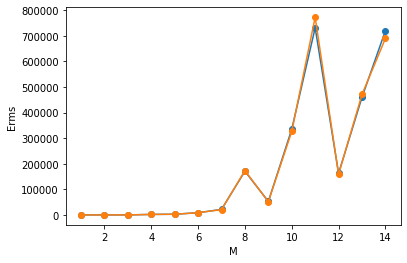

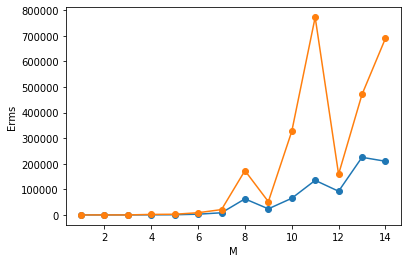

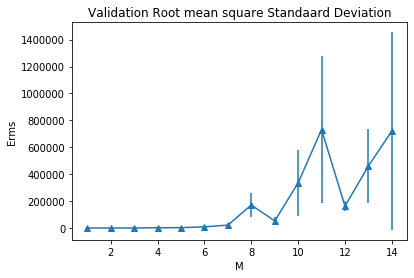

In [11]:
min_indx = np.argsort(v_rms)[0]
print("Best Order is : " , min_indx+1 )

dataP2.plotrms(v_rms, tr_rms,0)
dataP2.plotrms(t_rms, tr_rms,1)


x  = range(1,len(v_rms)+1)
plt.title("Validation RMS Standaard Deviation")
plt.xlabel("M")
plt.ylabel("Erms")
plt.errorbar(x, v_rms, valid_std, marker='^')
plt.show()
